# Relax Inc. Take-Home Challenge

The data is available as two attached CSV files:

takehome_user_engagement. csv

takehome_users . csv

The data has the following two tables:

1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:

● name: the user's name

● object_id: the user's id

● email: email address

● creation_source: how their account was created. This takes on one of 5 values:



○ PERSONAL_PROJECTS: invited to join another user's
personal workspace

○ GUEST_INVITE: invited to an organization as a guest
(limited permissions)

○ ORG_INVITE: invited to an organization (as a full member)

○ SIGNUP: signed up via the website

○ SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login
id)

● creation_time: when they created their account

● last_session_creation_time: unix timestamp of last login

● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails

● enabled_for_marketing_drip: whether they are on the regular
marketing email drip

● org_id: the organization (group of users) they belong to

● invited_by_user_id: which user invited them to join (if applicable).

2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day
that a user logged into the product.
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one seven-day
period , identify which factors predict future user
adoption .
We suggest spending 1-2
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [71]:
df_user = pandas.read_csv(r"D:\Nastaran\Springboard\relax_challenge\takehome_users.csv",encoding='utf-8')
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [72]:
df_engagement = pd.read_csv(r"D:\Nastaran\Springboard\relax_challenge\takehome_user_engagement.csv", encoding='utf-8' )

In [73]:
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [74]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


we have missing value in last_session_creation_time and invited_by_user_id

In [75]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [76]:
df_user.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [77]:
df_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [85]:
# convert creation_time to datetime
df_user['creation_time'] = pd.to_datetime(df_user['creation_time'])

In [86]:
# remove name, email
df_user.drop(['name', 'email'], axis=1, inplace=True)

In [87]:
#convert time_stamp to datetime
df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])

I will use the engagement data to identify users who log on at least 3 times in a seven day period.

In [88]:
# pull out date portion of timestamp
df_engagement['time_date']=pd.to_datetime(df_engagement['time_stamp'].dt.date)

In [89]:
# group by user_id and time_date 
grouped = df_engagement.groupby(['user_id','time_date']).agg({'visited':sum})

In [90]:
grouped = grouped.reset_index(drop=False)

In [92]:
# now calculate if login displays an adopted user (3rd time in one week)
from datetime import timedelta
grouped['adopted']=(grouped['user_id']==grouped['user_id'].shift(2)) \
                     &(grouped['time_date']<(grouped['time_date'].shift(2)+timedelta(days=7)))

In [93]:
# get adopted status by choosing the maximum value of adopted
df_adopted = grouped.groupby(['user_id'],as_index=False)['adopted'].max()

In [95]:
# add the adopted information to the users dataframe by merging users and adopted
df_merged = df_user.merge(df_adopted, how='left', left_on=['object_id'], right_on=['user_id'])

In [96]:
# if adopted is missing a value, set it to False
df_merged.adopted.fillna(False,inplace=True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

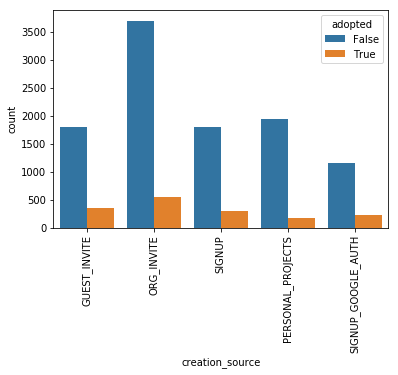

In [97]:
#look at categorical feature
sns.countplot(x='creation_source', data=df_merged, hue='adopted')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

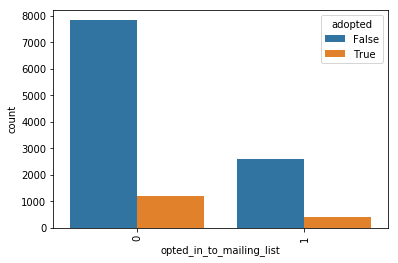

In [98]:
#Check out opted_in_to_mailing_list
sns.countplot(x='opted_in_to_mailing_list', data=df_merged, hue='adopted')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

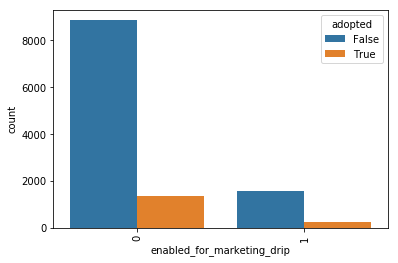

In [99]:
# Check out enabled_for_marketing_drip
sns.countplot(x='enabled_for_marketing_drip', data=df_merged, hue='adopted')
plt.xticks(rotation=90)

In [100]:
# check on values of numeric variables
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6.000500e+03,3.464246e+03,1.000000e+00,3.000750e+03,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,8823.0,1.379279e+09,1.953116e+07,1.338452e+09,1.363195e+09,1.382888e+09,1.398443e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.000000e+00,2.900000e+01,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.000000e+00,3.058000e+03,5.954000e+03,8.817000e+03,1.199900e+04
user_id,8823.0,6.019822e+03,3.464251e+03,1.000000e+00,3.017500e+03,6.034000e+03,9.029500e+03,1.200000e+04


In [101]:
# create a new feature, that will convert creation_time to how many days the user has been on the system
#    use the latest date from the usage data as the extract date
extract_dt = pd.to_datetime(max(df_engagement['time_date']))
df_merged['age'] = (extract_dt-df_merged['creation_time']).dt.days

In [102]:
# the last session creation time is available from two sources last_session_creation_time on users and
#    the maximum date from the usage table. Combine this information into a binary variable, =0 if they never
#    logged in or 1 if they have had a login
df_merged['active'] =  df_merged['last_session_creation_time'].isnull().astype(int)

# invited_by_user_id

1) whether a user recevied an invitation - transform to an 0/1 indicator

2) how many times they have invited someone to join - create count of invitations

In [103]:
# create invited flag
df_merged['invited'] =  df_merged['invited_by_user_id'].isnull().astype(int)

In [104]:
# get number of invitations by each user_id
df_inv = df_merged.groupby('invited_by_user_id',as_index=False)['adopted'].agg({'invites': 'count'})

In [106]:
# merge df_inv with previous merge
df_merged2 = df_merged.merge(df_inv, how='left', left_on=['object_id'], right_on=['invited_by_user_id'])

In [116]:
# create dummy variables for creation_source
df_with_dummies = pd.get_dummies(df_merged2, prefix='creation_source', columns=['creation_source'])

In [115]:
# get unique counts for each column in df_with_dummies
for col in df_with_dummies.columns: print(col, df_with_dummies[col].nunique())

object_id 12000
opted_in_to_mailing_list 2
enabled_for_marketing_drip 2
org_id 417
adopted 2
age 730
active 2
invited 2
invites 13
creation_source_GUEST_INVITE 2
creation_source_ORG_INVITE 2
creation_source_PERSONAL_PROJECTS 2
creation_source_SIGNUP 2
creation_source_SIGNUP_GOOGLE_AUTH 2


In [117]:
# instead of having adopted as a boolean, change it to an integer
df_with_dummies['adopted']=df_with_dummies['adopted'].astype(int)

In [118]:
# index on object_id
df_with_dummies = df_with_dummies.set_index(['object_id'])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


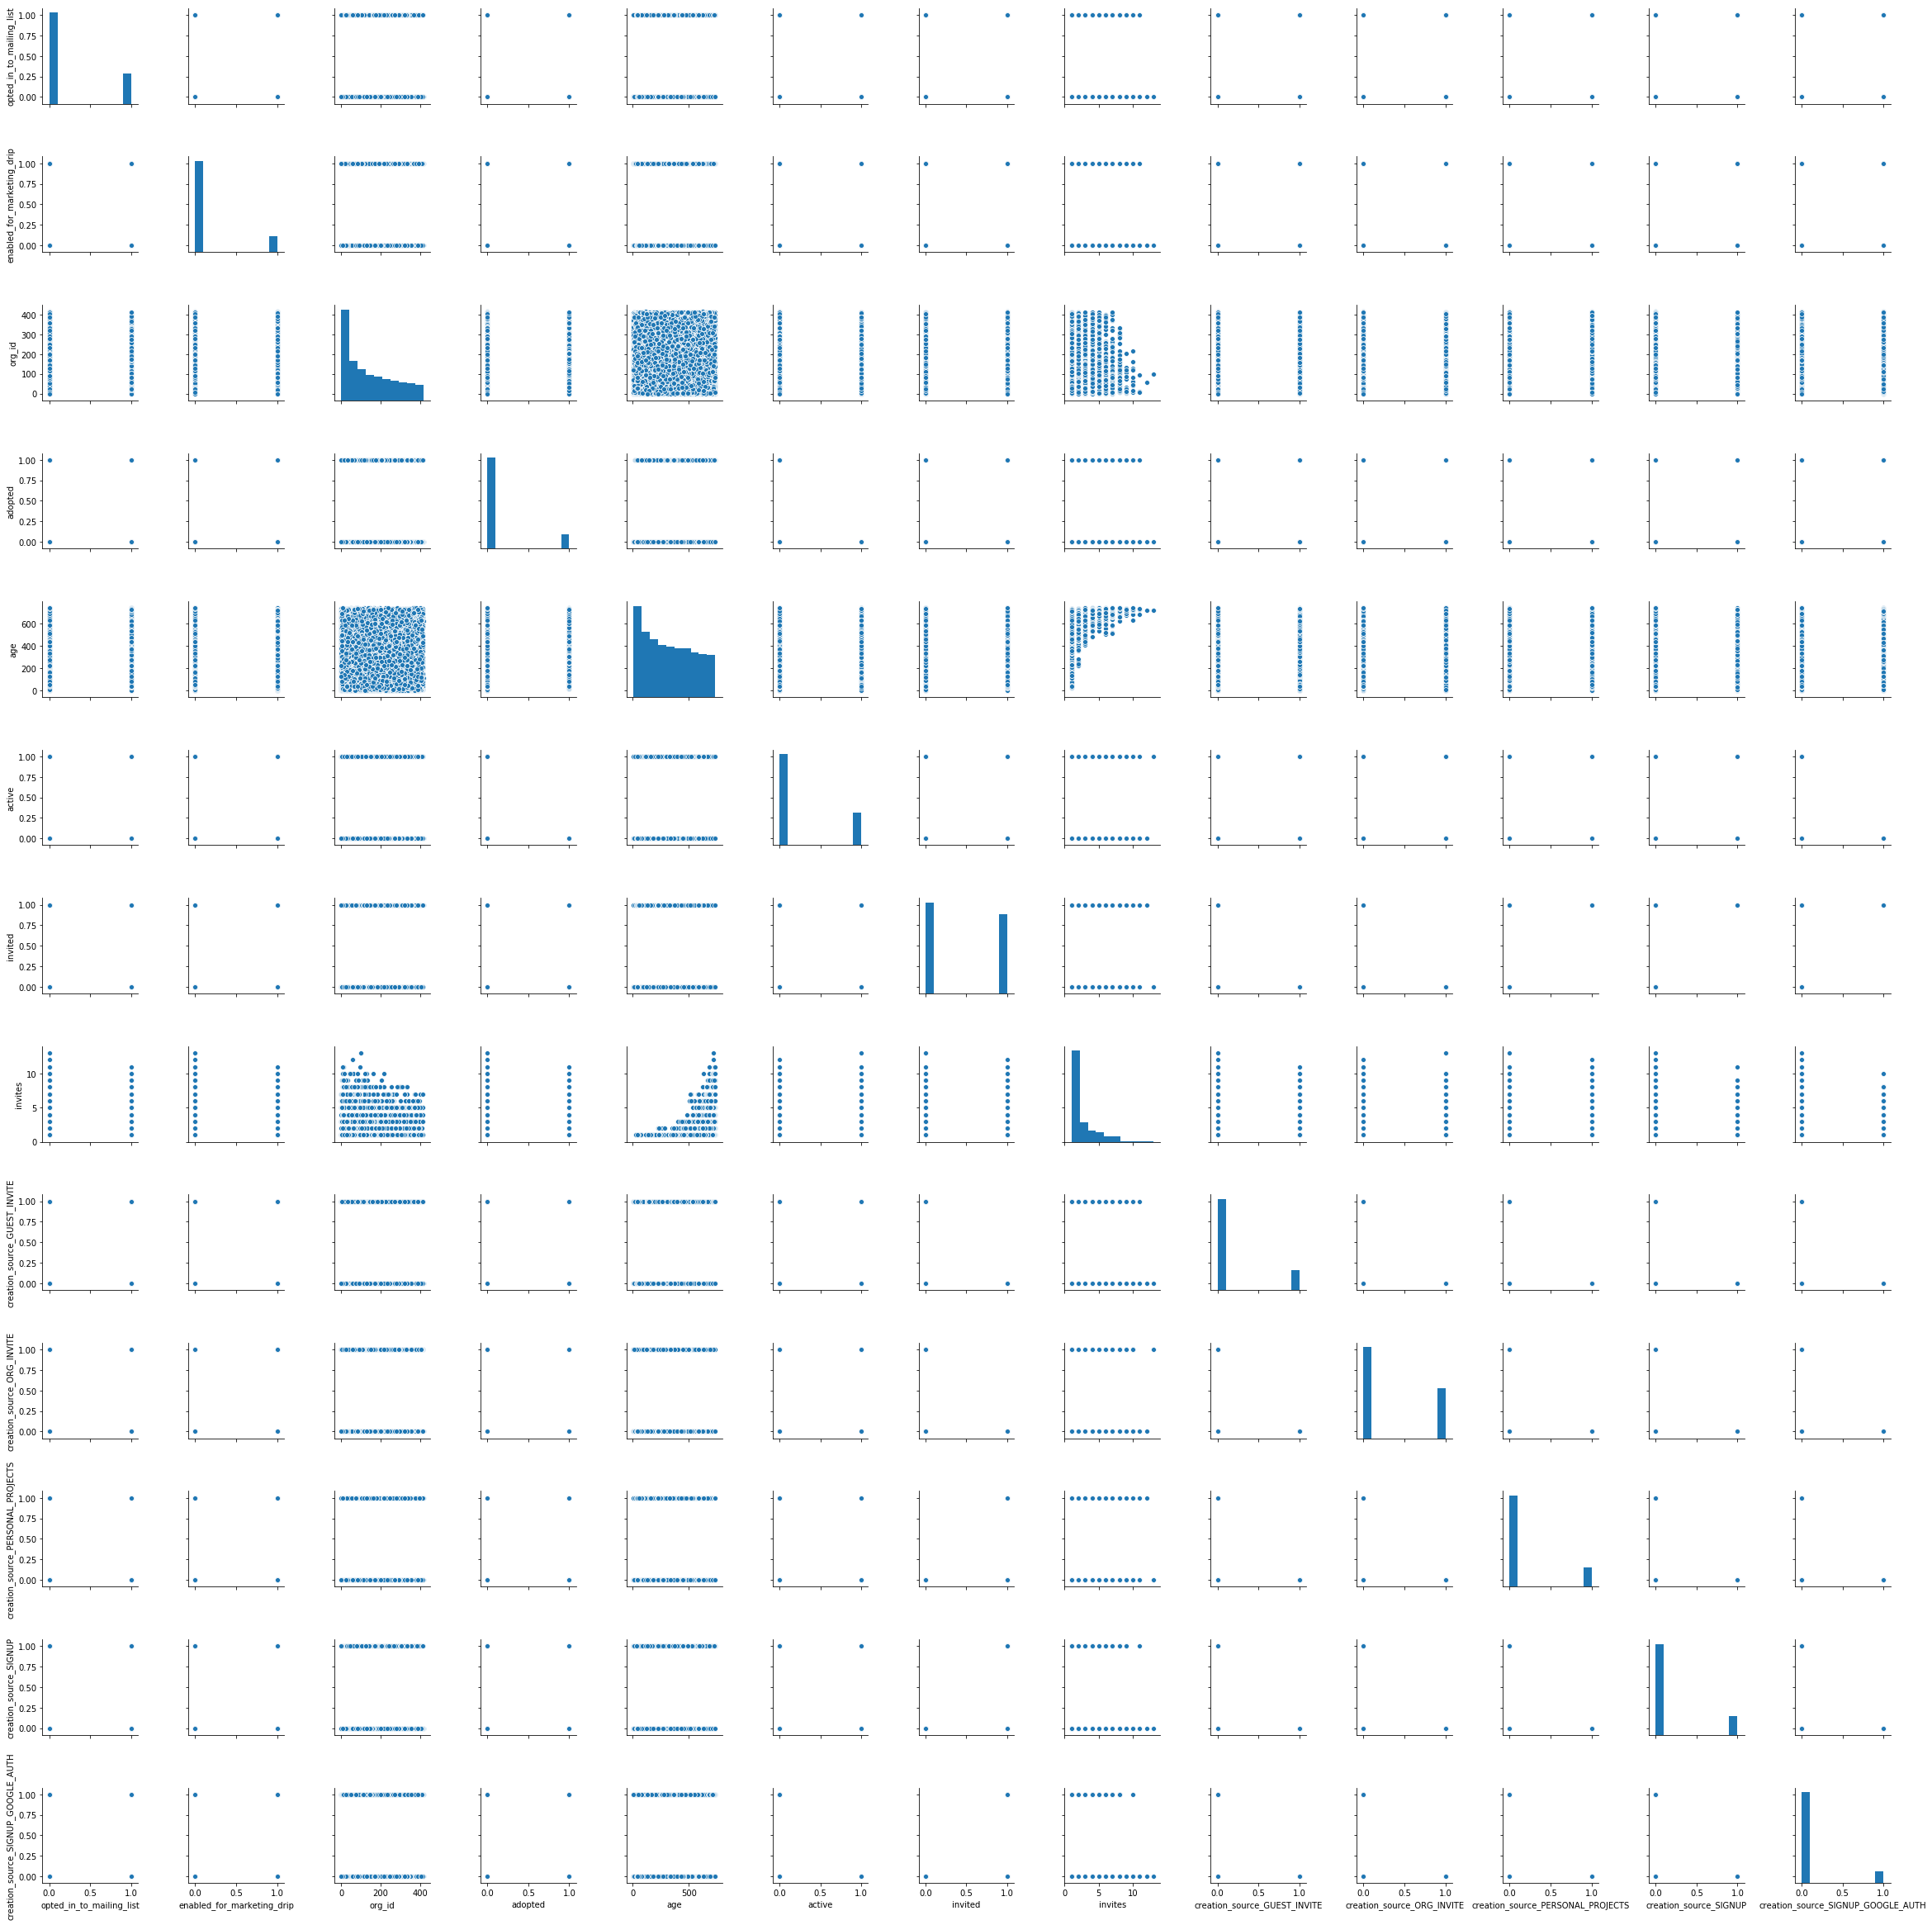

In [119]:
# display the pairplots
sns.pairplot(df_with_dummies)

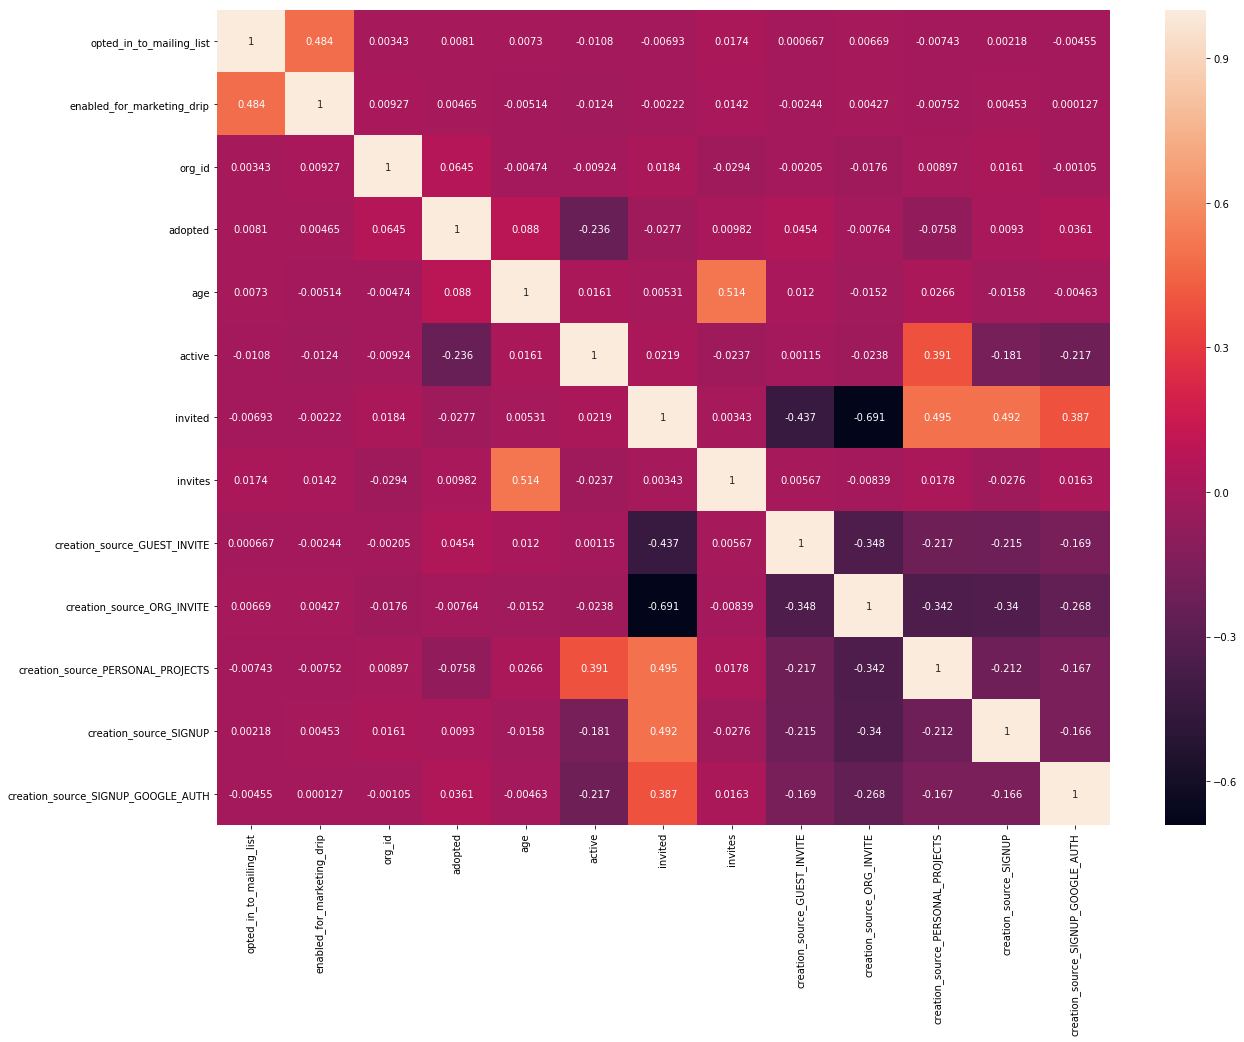

In [120]:
# display a correlation heatmap
corr = df_with_dummies.corr()

plt.subplots(figsize=(20,15))
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.3g')

# preprocessing

This is a classification problem: to identify which factors predict adoption (a binary classifier, yes or no).


In [124]:
data = {'field': ['object_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
                'org_id','adopted', 'age', 'active','invited','invites','creation_source_GUEST_INVITE',
                'creation_source_ORG_INVITE','creation_source_PERSONAL_PROJECTS','creation_source_SIGNUP',
                'creation_source_SIGNUP_GOOGLE_AUTH'],
        'Description':['index - users id','0/1 flag for receiving marketing emails',
                       '0/1 flag for being on regular marketing email drip','categorical variable - group of users to which they belong',
                      '0/1 flag for whether they are considered an adopted user','number of days since creation',
                      '0/1 flag for if they have ever logged in','0/1 flag for if they were invited to join',
                      'number of invites they have made', 'N/A','N/A', 'N/A','N/A','N/A']}
df = pd.DataFrame(data, columns=['field','Description'])
df

,field,Description
0,object_id,index - users id
1,opted_in_to_mailing_list,0/1 flag for receiving marketing emails
2,enabled_for_marketing_drip,0/1 flag for being on regular marketing email ...
3,org_id,categorical variable - group of users to which...
4,adopted,0/1 flag for whether they are considered an ad...
5,age,number of days since creation
6,active,0/1 flag for if they have ever logged in
7,invited,0/1 flag for if they were invited to join
8,invites,number of invites they have made
9,creation_source_GUEST_INVITE,N/A


In [156]:
# set up features and target variables 
y =df_with_dummies['adopted']
X = df_with_dummies.drop(['adopted','org_id'],axis=1).values

In [158]:
# scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

# Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
labels = [False, True]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
print(classification_report(y_test, y_pred))

[[3135    0]
 [ 465    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3135
           1       0.00      0.00      0.00       465

    accuracy                           0.87      3600
   macro avg       0.44      0.50      0.47      3600
weighted avg       0.76      0.87      0.81      3600



C:\Users\arna_mora\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[False, True] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\arna_mora\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arna_mora\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arna_mora\AppData\Roaming\Python\Python37\site-packages\sklearn\m

# Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred1 = RF.predict(X_test)

In [170]:
cm1 = confusion_matrix(y_test, y_pred1, labels)
print(cm1)
print(classification_report(y_test, y_pred1))

[[2803  332]
 [ 384   81]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3135
           1       0.20      0.17      0.18       465

    accuracy                           0.80      3600
   macro avg       0.54      0.53      0.54      3600
weighted avg       0.79      0.80      0.80      3600



C:\Users\arna_mora\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[False, True] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


# Tune Model Parameters

In [186]:
from sklearn.model_selection import RandomizedSearchCV
#The Random Forest model gave a more balanced response, I will try to tune it further.
# First create the base model to tune
RF1 = RandomForestClassifier(class_weight='balanced')

# Set up grid search of hyperparameters
random_grid = {"max_features": ['auto', 'sqrt'],
               "max_depth": [1,10,20,30,40,50,60,70,80,90,100, None],
               "min_samples_leaf": [1,3,10],
               "min_samples_split": [2,5,10],
               "bootstrap": [True, False],
               "n_estimators": [10,100]}
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF1, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=10, random_state=42, n_jobs = -1)

In [187]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   13.3s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100]},
                   random_state=42, verbose=10)

In [188]:
# display best parameters
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [189]:
# rerun model with best parameters
RF2 = RandomForestClassifier(class_weight='balanced',
                                 n_estimators = 10,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features='sqrt',
                                 max_depth= 50,
                                 bootstrap = True)
    
model = RF2.fit(X_train,y_train)

In [190]:
# run test against new model
y_pred2 =model.predict(X_test)

In [194]:
# show model results
cm2 = confusion_matrix(y_test, y_pred2, labels)
print(cm2)
print(classification_report(y_test,y_pred2))

print('Accuracy of the Random Forest Model on test set: {:.3f}'.format(model.score(X_test, y_test)))

[[2724  411]
 [ 377   88]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3135
           1       0.18      0.19      0.18       465

    accuracy                           0.78      3600
   macro avg       0.53      0.53      0.53      3600
weighted avg       0.79      0.78      0.78      3600

Accuracy of the Random Forest Model on test set: 0.781


In [215]:
model.feature_importances_

array([0.01151064, 0.01072796, 0.73292339, 0.18994157, 0.00141591,
       0.03986817, 0.00281547, 0.0015353 , 0.00534168, 0.00220217,
       0.00171773])

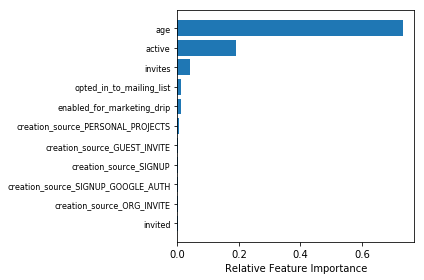

In [224]:
importance = model.feature_importances_

sorted_idx = np.argsort(importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(save_X_columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

# Conclusion

As we can see Three factors 'age', 'active', 'invites' held the most weight in predicting that user would adopt:
